In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

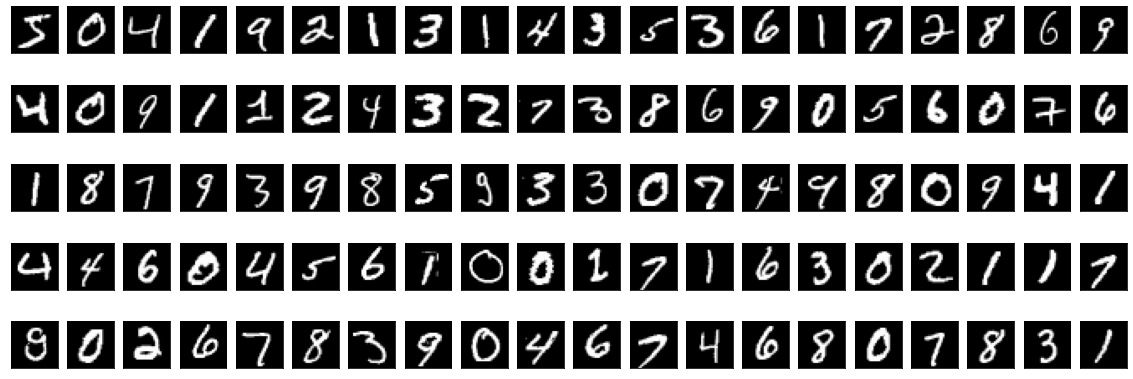

In [3]:
i = 0

plt.figure(figsize = (20, 7))
for i in range(100):
  plt.subplot(5,20, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
plt.show()

In [4]:
X_train, X_test = X_train.astype('float32')/255, X_test.astype('float32')/255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [5]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [6]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [7]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.1414 - accuracy: 0.9559 - val_loss: 0.0520 - val_accuracy: 0.9847
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0396 - val_accuracy: 0.9890
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0437 - val_accuracy: 0.9876
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0436 - val_accuracy: 0.9891
Epoch 5/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0427 - val_accuracy: 0.9886
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0431 - val_accuracy: 0.9894
Epoch 7/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0332 - va

In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.0512 - accuracy: 0.9893
0.05115456506609917 0.989300012588501


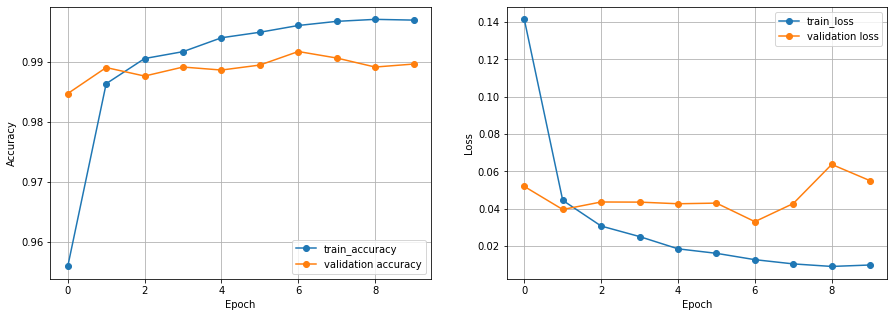

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label= 'train_accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label= 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label= 'train_loss')
plt.plot(h.history['val_loss'], 'o-', label= 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [11]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0413 - val_accuracy: 0.9923
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0404 - val_accuracy: 0.9920
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0404 - val_accuracy: 0.9925
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 9.4779e-04 - accuracy: 0.9998 - val_loss: 0.0405 - val_accuracy: 0.9928
Epoch 5/10
1500/1500 [==============================] - 25s 16ms/step - loss: 7.7760e-04 - accuracy: 0.9999 - val_loss: 0.0408 - val_accuracy: 0.9926
Epoch 6/10
1500/1500 [==============================] - 25s 17ms/step - loss: 6.6201e-04 - accuracy: 0.9999 - val_loss: 0.0410 - val_accuracy: 0.9925
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 5.7439e-04 - accuracy: 0.9999 - va

In [12]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0335 - accuracy: 0.9936
0.033455003052949905 0.9936000108718872


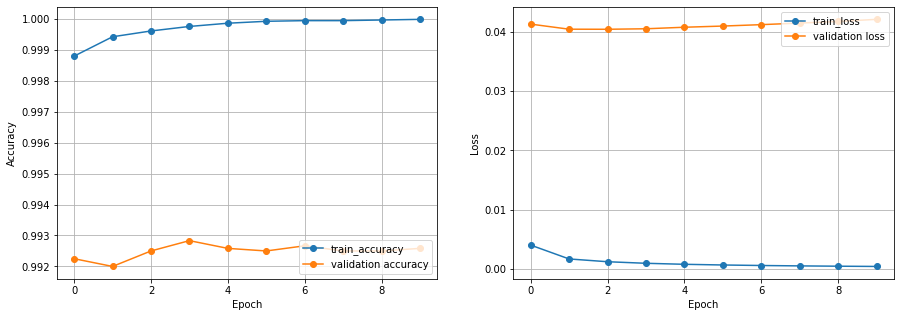

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label= 'train_accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label= 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label= 'train_loss')
plt.plot(h.history['val_loss'], 'o-', label= 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [15]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 40s 25ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0728 - val_accuracy: 0.9921
Epoch 2/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1016 - val_accuracy: 0.9918
Epoch 3/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1032 - val_accuracy: 0.9927
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 5.3084e-04 - accuracy: 0.9999 - val_loss: 0.1142 - val_accuracy: 0.9925
Epoch 5/10
1500/1500 [==============================] - 28s 18ms/step - loss: 1.8468e-04 - accuracy: 0.9999 - val_loss: 0.1123 - val_accuracy: 0.9937
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 3.0115e-04 - accuracy: 0.9999 - val_loss: 0.1287 - val_accuracy: 0.9927
Epoch 7/10
1500/1500 [==============================] - 33s 22ms/step - loss: 1.5829e-04 - accuracy: 0.9999 - va

In [16]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.1040 - accuracy: 0.9939
0.10402420908212662 0.9939000010490417


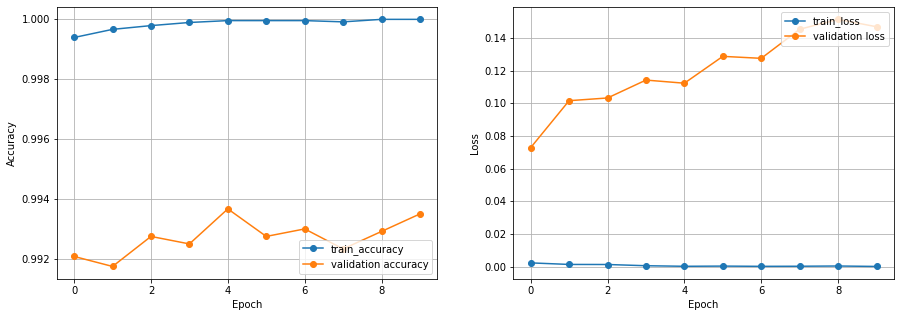

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label= 'train_accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label= 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label= 'train_loss')
plt.plot(h.history['val_loss'], 'o-', label= 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()